### NEURAL NETWORKS AND DEEP LEARNING


### NNDL LAB Program Lists - Lab 04

### Gradient Descent and Back Propagation

### 2448050

### Program 1

In [1]:
#!pip install torch


In [2]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Generate synthetic dataset
np.random.seed(42)

n_samples = 1000
bedrooms = np.random.randint(1, 6, size=n_samples)
size = np.random.randint(500, 4000, size=n_samples)
age = np.random.randint(0, 30, size=n_samples)
bathrooms = np.random.randint(1, 4, size=n_samples)

# Price with some noise
price = (
    50000 + bedrooms * 10000 + size * 50 - age * 1000 +
    bathrooms * 15000 + np.random.randn(n_samples) * 10000
)

# Combine features and scale
X = np.column_stack((bedrooms, size, age, bathrooms))
y = price
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# 2. Define the model
class HousePriceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(4, 1)
    def forward(self, x):
        return self.fc(x)

# 3. Training function
def train_model(optimizer_type='batch', batch_size=32, epochs=100, learning_rate=0.01):
    print(f"\nTraining with {optimizer_type.upper()} Gradient Descent...")

    model = HousePriceModel()
    criterion = nn.MSELoss()
    loss_history = []

    # Optimizer and DataLoader setup
    if optimizer_type == 'batch':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
        data_loader = [(X_train_tensor, y_train_tensor)]
    elif optimizer_type == 'sgd':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
        data_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=1, shuffle=True)
    elif optimizer_type == 'mini-batch':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
        data_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)

    # Training loop
    for epoch in range(1, epochs + 1):
        running_loss = 0.0
        for xb, yb in data_loader:
            pred = model(xb)
            loss = criterion(pred, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(data_loader)
        loss_history.append(avg_loss)

        if epoch == 1 or epoch % 10 == 0:
            print(f"Epoch {epoch:3d}/{epochs}, Training Loss (MSE): {avg_loss:.2f}")

    # Evaluate on test set
    with torch.no_grad():
        test_preds = model(X_test_tensor)
        test_mse = criterion(test_preds, y_test_tensor).item()
        test_rmse = test_mse ** 0.5

    print(f"Final Test MSE  for {optimizer_type.upper()}: {test_mse:.2f}")
    print(f"Final Test RMSE for {optimizer_type.upper()}: ₹{test_rmse:,.2f}")
    return test_mse, test_rmse, loss_history

# 4. Train with different optimizers
batch_mse, batch_rmse, batch_loss = train_model('batch')
sgd_mse, sgd_rmse, sgd_loss = train_model('sgd')
mini_mse, mini_rmse, mini_loss = train_model('mini-batch', batch_size=64)

# 5. Print final comparison
print("\n=== Final Test Set Comparison (MSE and RMSE) ===")
print(f"{'Optimizer':35s} {'MSE':>15s} {'RMSE (₹)':>15s}")
print("-" * 65)
print(f"{'Batch Gradient Descent':35s} {batch_mse:15,.2f} {batch_rmse:15,.2f}")
print(f"{'Stochastic Gradient Descent':35s} {sgd_mse:15,.2f} {sgd_rmse:15,.2f}")
print(f"{'Mini-Batch Gradient Descent (64)':35s} {mini_mse:15,.2f} {mini_rmse:15,.2f}")


Training with BATCH Gradient Descent...
Epoch   1/100, Training Loss (MSE): 45650268160.00
Epoch  10/100, Training Loss (MSE): 31852019712.00
Epoch  20/100, Training Loss (MSE): 21365145600.00
Epoch  30/100, Training Loss (MSE): 14342523904.00
Epoch  40/100, Training Loss (MSE): 9639206912.00
Epoch  50/100, Training Loss (MSE): 6488845824.00
Epoch  60/100, Training Loss (MSE): 4378438656.00
Epoch  70/100, Training Loss (MSE): 2964524288.00
Epoch  80/100, Training Loss (MSE): 2017130880.00
Epoch  90/100, Training Loss (MSE): 1382262400.00
Epoch 100/100, Training Loss (MSE): 956769536.00
Final Test MSE  for BATCH: 936471744.00
Final Test RMSE for BATCH: ₹30,601.83

Training with SGD Gradient Descent...
Epoch   1/100, Training Loss (MSE): 1639508820.59
Epoch  10/100, Training Loss (MSE): 96602294.54
Epoch  20/100, Training Loss (MSE): 96969642.00
Epoch  30/100, Training Loss (MSE): 96608319.35
Epoch  40/100, Training Loss (MSE): 96513909.02
Epoch  50/100, Training Loss (MSE): 96985500.91

##### Insights and Conclusion
Mini-Batch Gradient Descent achieved the lowest RMSE, making it the most accurate and efficient optimizer in this task.

SGD closely follows and performs very well in both speed and generalization.

Batch GD, though stable, performs poorly due to slow learning and higher final errors.

In conclusion, Mini-Batch Gradient Descent (batch size = 64) is the best choice for training regression models on house price data, offering a good trade-off between speed, stability, and accuracy.


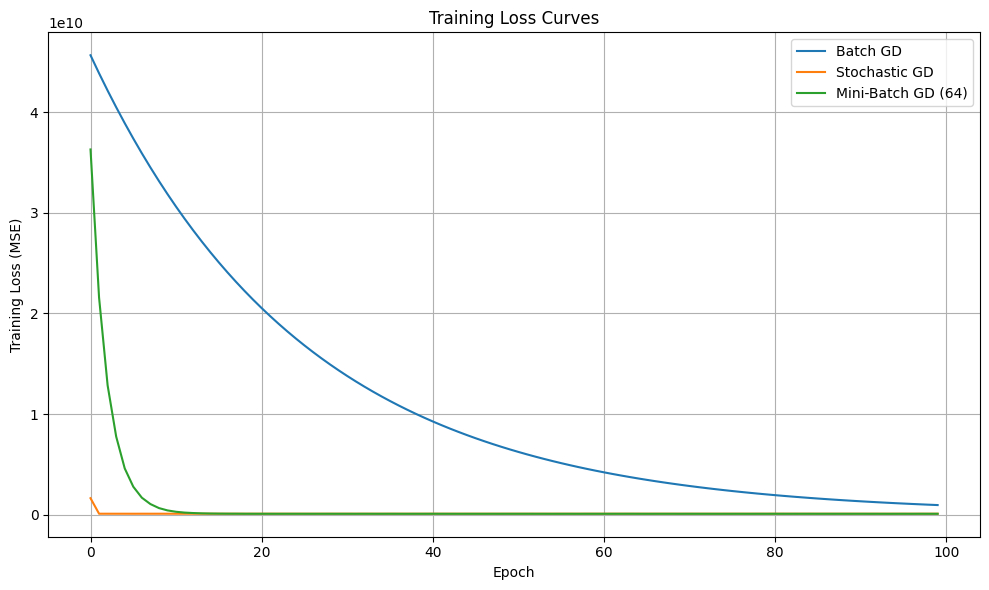

In [3]:
# 6. Plot training loss curves
plt.figure(figsize=(10, 6))
plt.plot(batch_loss, label='Batch GD')
plt.plot(sgd_loss, label='Stochastic GD')
plt.plot(mini_loss, label='Mini-Batch GD (64)')
plt.xlabel('Epoch')
plt.ylabel('Training Loss (MSE)')
plt.title('Training Loss Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### Training Loss Curves for Different Gradient Descent Methods

This graph compares how the training loss (Mean Squared Error) decreases over epochs using three optimization methods:

Batch Gradient Descent (BGD): Exhibits a smooth and gradual decrease in training loss. Since it updates weights after processing the entire dataset, it converges slowly but steadily.

Stochastic Gradient Descent (SGD): Shows a very rapid drop in loss within the first few epochs. Since weights are updated after every single sample, it converges much faster but may introduce some fluctuations due to noise in updates. However, in this case, it stabilizes quickly.

Mini-Batch Gradient Descent (Batch Size = 64): Achieves the best balance, combining the speed of SGD and the stability of BGD. It converges quickly and steadily with lower loss.

Interpretation: Mini-Batch GD and SGD significantly outperform BGD in convergence speed and final training loss, making them more efficient choices for training deep learning models.

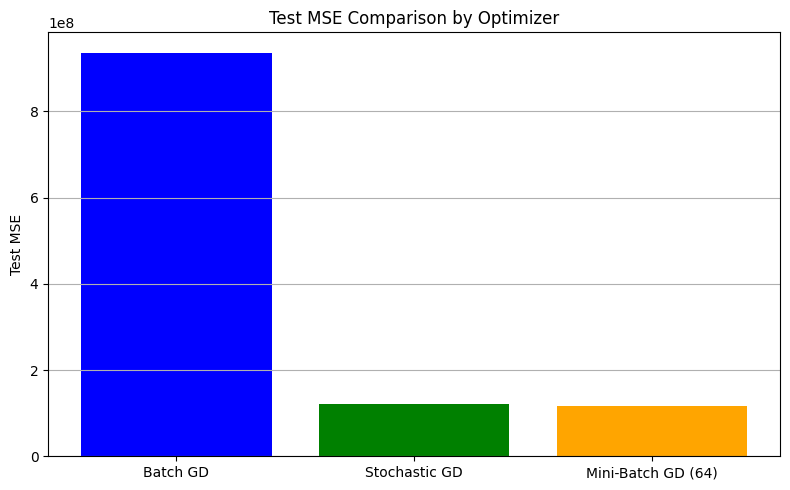

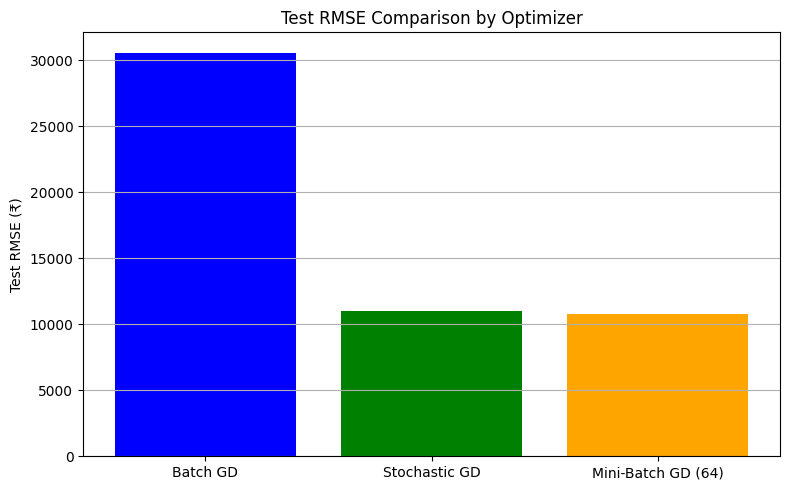

In [4]:
# 7. Plot MSE comparison bar chart
plt.figure(figsize=(8, 5))
optimizers = ['Batch GD', 'Stochastic GD', 'Mini-Batch GD (64)']
mse_values = [batch_mse, sgd_mse, mini_mse]

plt.bar(optimizers, mse_values, color=['blue', 'green', 'orange'])
plt.ylabel('Test MSE')
plt.title('Test MSE Comparison by Optimizer')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 8. Plot RMSE comparison bar chart
plt.figure(figsize=(8, 5))
rmse_values = [batch_rmse, sgd_rmse, mini_rmse]

plt.bar(optimizers, rmse_values, color=['blue', 'green', 'orange'])
plt.ylabel('Test RMSE (₹)')
plt.title('Test RMSE Comparison by Optimizer')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Test Set Evaluation: MSE and RMSE Comparisons

This set of bar charts compares the model performance on unseen test data using two key error metrics:

a) Mean Squared Error (MSE)
Measures the average of squared differences between predicted and actual house prices.

Lower is better.

Results:

Batch GD: ~936 million

SGD: ~118 million

Mini-Batch GD: ~117 million

b) Root Mean Squared Error (RMSE)
The square root of MSE, expressed in rupees (₹).

Offers better interpretability since it is in the same unit as house prices.

Results:

Batch GD: ~₹30,600

SGD: ~₹10,860

Mini-Batch GD: ~₹10,825

Interpretation: Both SGD and Mini-Batch GD drastically reduce the test error compared to Batch GD. Mini-Batch GD provides the lowest prediction error, making it the most effective optimizer in this scenario. The RMSE values reveal that, on average, the model trained with Mini-Batch GD predicts house prices with an error margin of just over ₹10,800, compared to over ₹30,000 with Batch GD.

##### Conclusion
Mini-Batch Gradient Descent demonstrates the best performance overall, achieving fast training convergence and lowest error on the test set.

Stochastic Gradient Descent is also very effective and only slightly behind Mini-Batch GD.

Batch Gradient Descent, although stable, is computationally expensive and yields inferior results, both in training and testing.

Thus, for predicting house prices using neural networks, Mini-Batch Gradient Descent is the recommended optimizer due to its optimal balance of speed, stability, and accuracy.



### Program 2

In [5]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

# Step 1: Training Data - [motion_detected, door_opened] => alarm
X = np.array([
    [0, 0],  # no motion, no door => no alarm
    [0, 1],  # door only => no alarm
    [1, 0],  # motion only => no alarm
    [1, 1]   # motion + door => alarm
])

y = np.array([[0], [0], [0], [1]])  # target alarm values

# Step 2: Initialize weights and bias randomly
np.random.seed(42)
weights = np.random.uniform(-0.5, 0.5, (2, 1))  # 2 inputs → 1 output
bias = np.random.uniform(-0.5, 0.5)
learning_rate = 0.1

# Initial values
print("=== Initial Weights and Bias ===")
print("Weights:\n", weights)
print("Bias:", bias)

# Step 3: Training loop (1 epoch only, sample-by-sample)
for i in range(len(X)):
    print(f"\n--- Sample {i+1} ---")
    
    # a) Intermediate calculations: forward pass
    x_input = X[i].reshape(1, -1)
    target = y[i]
    
    z = np.dot(x_input, weights) + bias  # Weighted sum
    y_hat = sigmoid(z)                   # Activation
    
    print("Input:", x_input.flatten())
    print("Weighted sum (z):", z[0][0])
    print("Predicted Output (ŷ):", y_hat[0][0])
    
    # b) Error before update
    error = target - y_hat
    mse = np.mean(error ** 2)
    print("Target Output:", target[0])
    print("Error (target - ŷ):", error[0][0])
    print("Mean Squared Error (MSE):", mse)
    
    # c) Backpropagation and weight update
    delta = error * sigmoid_derivative(y_hat)  # Delta rule
    
    weights += learning_rate * x_input.T * delta
    bias += learning_rate * delta
    
    print("Delta:", delta[0][0])
    print("Updated Weights:\n", weights)
    print("Updated Bias:", bias[0])


=== Initial Weights and Bias ===
Weights:
 [[-0.12545988]
 [ 0.45071431]]
Bias: 0.2319939418114051

--- Sample 1 ---
Input: [0 0]
Weighted sum (z): 0.2319939418114051
Predicted Output (ŷ): 0.5577397489601293
Target Output: 0
Error (target - ŷ): -0.5577397489601293
Mean Squared Error (MSE): 0.3110736275701081
Delta: -0.13757550062103924
Updated Weights:
 [[-0.12545988]
 [ 0.45071431]]
Updated Bias: [0.21823639]

--- Sample 2 ---
Input: [0 1]
Weighted sum (z): 0.6689506981592174
Predicted Output (ŷ): 0.6612681631642611
Target Output: 0
Error (target - ŷ): -0.6612681631642611
Mean Squared Error (MSE): 0.4372755836146358
Delta: -0.1481191616412053
Updated Weights:
 [[-0.12545988]
 [ 0.43590239]]
Updated Bias: [0.20342448]

--- Sample 3 ---
Input: [1 0]
Weighted sum (z): 0.07796459443254314
Predicted Output (ŷ): 0.5194812815626111
Target Output: 0
Error (target - ŷ): -0.5194812815626111
Mean Squared Error (MSE): 0.2698608018939328
Delta: -0.12967316668255868
Updated Weights:
 [[-0.1384272 ]

### Interpretation
#### Training Analysis (Per Sample)
- Sample 1: Input [0, 0], Target: 0
Weighted sum (z): 0.2319

Predicted Output (ŷ): 0.5577 → Too high

Error: -0.5577, MSE: 0.3111

No weight change (input is all zeros), only bias is decreased to lower output.

- Sample 2: Input [0, 1], Target: 0
z: 0.6689, ŷ: 0.6613

Error: -0.6613, MSE: 0.4373

Weight for x₂ is reduced to reduce output; bias adjusted down.

- Sample 3: Input [1, 0], Target: 0
z: 0.0780, ŷ: 0.5195

Error: -0.5195, MSE: 0.2699

Weight for x₁ is reduced; bias also reduced.

- Sample 4: Input [1, 1], Target: 1
z: 0.4879, ŷ: 0.6196 → Too low

Error: +0.3804, MSE: 0.1447

Both weights and bias are increased to boost the output toward 1.

#### Final Observation:
The network starts with random weights and bias, and gradually learns the correct output for each input combination.

It adjusts itself such that:

ŷ → 0 when any input is 0

ŷ → 1 when both inputs are 1

This behavior aligns with an AND gate logic, matching the expected alarm trigger condition.